In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv("dataset/train.csv")
test_df = pd.read_csv("dataset/test.csv")

In [3]:
RANDOM_SEED = 42

In [4]:
train_df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [5]:
train_df.isna().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used          9000
Number_Weeks_Quit             0
Season                        0
Crop_Damage                   0
dtype: int64

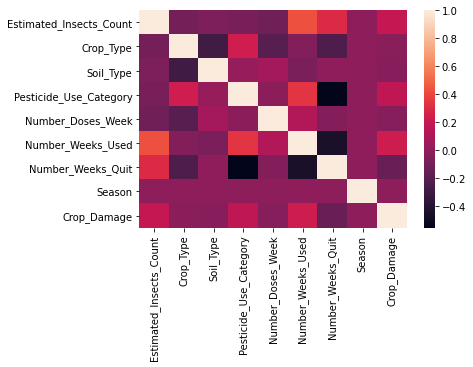

In [6]:
sns.heatmap(train_df.corr())

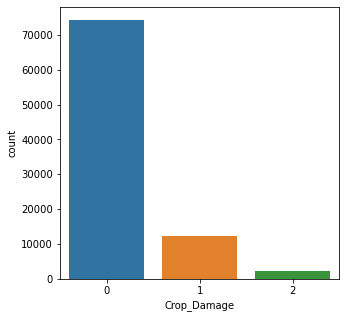

In [7]:
plt.figure(figsize=(5,5))
sns.countplot(train_df['Crop_Damage'])

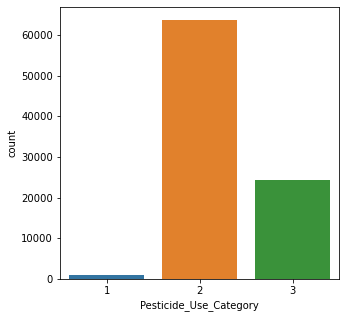

In [8]:
plt.figure(figsize=(5,5))
sns.countplot(train_df['Pesticide_Use_Category'])

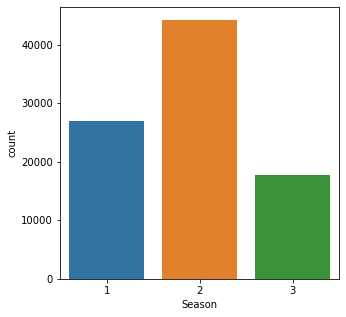

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(train_df['Season'])

In [10]:
from sklearn.utils import resample

In [11]:
out_0 = train_df[train_df['Crop_Damage']==0]
out_1 = train_df[train_df['Crop_Damage']==1]
out_2 = train_df[train_df['Crop_Damage']==2]

In [12]:
out_1_up = resample(out_1,
                     replace=True,
                     n_samples=len(out_0),
                     random_state=RANDOM_SEED)

In [13]:
out_2_up = resample(out_2,
                   replace=True,
                   n_samples=len(out_0),
                   random_state=RANDOM_SEED)

In [14]:
train_re = pd.concat([out_0,out_1_up,out_2_up])

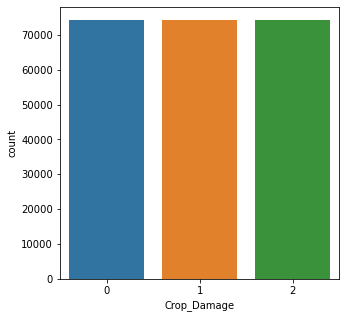

In [15]:
plt.figure(figsize=(5,5))
sns.countplot(train_re['Crop_Damage'])

In [16]:
train_re.fillna(int(train_df['Number_Weeks_Used'].mean()),inplace=True)
test_df.fillna(int(test_df['Number_Weeks_Used'].mean()),inplace=True)

In [17]:
train_re.isna().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

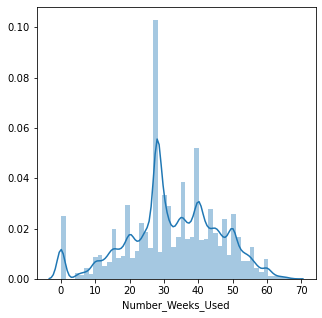

In [18]:
plt.figure(figsize=(5,5))
sns.distplot(train_re['Number_Weeks_Used'])

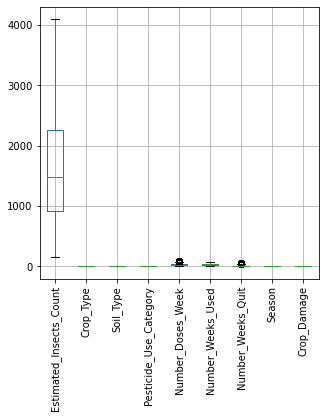

In [19]:
train_re.boxplot(figsize=(5,5),rot=90)

In [20]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
from sklearn.compose import make_column_transformer

In [37]:
'''mm_sc = MinMaxScaler()
st_sc = StandardScaler()

train_re['Estimated_Insects_Count'] = mm_sc.fit_transform(train_re['Estimated_Insects_Count'].to_numpy().reshape(-1,1))
train_re.loc[:,['Number_Doses_Week','Number_Weeks_Quit','Number_Weeks_Used']] = st_sc.fit_transform(train_re[['Number_Doses_Week','Number_Weeks_Quit','Number_Weeks_Used']])'''

In [38]:
'''test_df['Estimated_Insects_Count'] = mm_sc.transform(test_df['Estimated_Insects_Count'].to_numpy().reshape(-1,1))
test_df.loc[:,['Number_Doses_Week','Number_Weeks_Quit','Number_Weeks_Used']] = st_sc.transform(test_df[['Number_Doses_Week','Number_Weeks_Quit','Number_Weeks_Used']])'''

In [21]:
train_re.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
8,F00000012,731,0,0,1,0,0.0,0,2,0
10,F00000021,1212,1,0,1,0,28.0,0,3,0
21,F00000048,3516,1,0,1,0,0.0,0,2,0
24,F00000052,150,0,0,3,30,26.0,0,2,0


In [22]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [23]:
x = train_re.drop(columns=['Crop_Damage','ID'])
y = train_re['Crop_Damage'].values
x_test = test_df.drop("ID",axis=1)

In [24]:
transformer = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['Crop_Type','Soil_Type','Pesticide_Use_Category','Season']),
                                     (StandardScaler(),['Estimated_Insects_Count','Number_Doses_Week','Number_Weeks_Used','Number_Weeks_Quit']))

In [25]:
x = transformer.fit_transform(x)
x_test = transformer.transform(x_test)

In [26]:
y = to_categorical(y,3)

In [27]:
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.2,random_state=RANDOM_SEED,stratify=y)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [82]:
kn = KNeighborsClassifier()

kn.fit(x_train,y_train)

y_pred = kn.predict(x_val)
accuracy_score(y_pred,y_val)

0.6479350033852403

In [83]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

y_pred = dt.predict(x_val)
y_pred = [int(i) for i in y_pred]
print(accuracy_score(y_pred,y_val))

y_test = dt.predict(x_test)
y_test = [int(i) for i in y_test]

0.6677048070413


In [86]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
y_pred = gbr.predict(x_val)
y_pred = [int(i) for i in y_pred]
print(accuracy_score(y_pred,y_val))

0.46499661475964793


In [88]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_val)
y_pred = [int(i) for i in y_pred]
print(accuracy_score(y_pred,y_val))

0.5381178063642519


In [92]:
svr = SVR(gamma='auto',kernel='rbf',C=4.5)
svr.fit(x_train,y_train)
y_pred = svr.predict(x_val)
y_pred = [int(i) for i in y_pred]
print(accuracy_score(y_pred,y_val))

0.46106973595125256


In [31]:
from keras.models import Sequential,load_model
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from livelossplot import PlotLossesKeras

In [ ]:
'''model = Sequential()
model.add(Dense(180,activation='relu',kernel_initializer='uniform',input_shape=(x_train.shape[1],)))
model.add(Dense(300,activation='relu',kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(300,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.4))
model.add(BatchNormalization())
model.add(Dense(30,activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.3))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()'''

In [32]:
model = load_model('crop_model.h5')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 180)               2700      
_________________________________________________________________
dense_27 (Dense)             (None, 300)               54300     
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dropout_14 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_15 (Dropout)         (None, 300)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)              

In [47]:
callback = [#EarlyStopping(patience=15,
             #            monitor='val_accuracy'),
           PlotLossesKeras()]

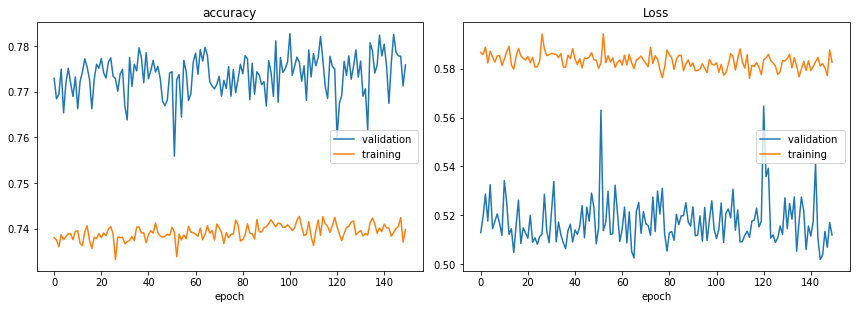

accuracy
	validation       	 (min:    0.756, max:    0.783, cur:    0.776)
	training         	 (min:    0.733, max:    0.743, cur:    0.740)
Loss
	validation       	 (min:    0.502, max:    0.565, cur:    0.512)
	training         	 (min:    0.576, max:    0.594, cur:    0.583)


In [48]:
h = model.fit(x_train,y_train,
             validation_data=(x_val,y_val),
             epochs=150,
             batch_size=64,
             callbacks=callback)

In [49]:
y_test = model.predict(x_test)
y_test = [np.argmax(i) for i in y_test]

In [50]:
sub = pd.DataFrame({'ID':test_df.ID,'Crop_Damage':y_test})
sub.to_csv("submissio.csv",index=False)

In [51]:
model.save('crop_model.h5')